### Libraries import

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")

import os

In [65]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 15)
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)

### Read Dataset

In [66]:
## read_csv file
Spotify_YT = pd.read_csv(r"data\Spotify_Youtube.csv")

### Data Cleaning

In [67]:
Spotify_YT.shape

(20718, 28)

In [68]:
Spotify_YT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

### Basic Statistics

- Data is at artist per song level

In [69]:
Spotify_YT.shape

(20718, 28)

In [70]:
Spotify_YT.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
                 ... 
Comments          569
Description       876
Licensed          470
official_video    470
Stream            576
Length: 28, dtype: int64

In [71]:
## treat string missing values
Spotify_YT.loc[Spotify_YT["Url_youtube"].isnull(), "Url_youtube"] = 'NA'
Spotify_YT.loc[Spotify_YT["Title"].isnull(), "Title"] = 'NA'
Spotify_YT.loc[Spotify_YT["Channel"].isnull(), "Channel"] = 'NA'
Spotify_YT.loc[Spotify_YT["Description"].isnull(), "Description"] = 'NA'
Spotify_YT.loc[Spotify_YT["Licensed"].isnull(), "Licensed"] = 'NA'
Spotify_YT.loc[Spotify_YT["official_video"].isnull(), "official_video"] = 'NA'

In [72]:
## treat numeric missing values
Spotify_YT.loc[Spotify_YT["Views"].isnull(), "Views"] = round(Spotify_YT["Views"].mean(),0)
Spotify_YT.loc[Spotify_YT["Likes"].isnull(), "Likes"] = round(Spotify_YT["Likes"].mean(),0)
Spotify_YT.loc[Spotify_YT["Comments"].isnull(), "Comments"] = round(Spotify_YT["Comments"].mean(),0)
Spotify_YT.loc[Spotify_YT["Stream"].isnull(), "Stream"] = round(Spotify_YT["Stream"].mean(),0)
Spotify_YT["Key"] = Spotify_YT["Key"].astype("string")

In [73]:
## Remove Unnecessary Columns
try:
    Spotify_YT.drop(columns=["Unnamed: 0"], inplace=True, )
except:
    pass

In [74]:
Spotify_YT.describe().T

count         mean          std      min         25%  \
Danceability     20716.00         0.62         0.17     0.00        0.52   
Energy           20716.00         0.64         0.21     0.00        0.51   
Loudness         20716.00        -7.67         4.63   -46.25       -8.86   
Speechiness      20716.00         0.10         0.11     0.00        0.04   
Acousticness     20716.00         0.29         0.29     0.00        0.05   
Instrumentalness 20716.00         0.06         0.19     0.00        0.00   
Liveness         20716.00         0.19         0.17     0.01        0.09   
Valence          20716.00         0.53         0.25     0.00        0.34   
Tempo            20716.00       120.64        29.58     0.00       97.00   
Duration_ms      20716.00    224717.58    124790.54 30985.00   180009.50   
Views            20718.00  93937821.13 271511065.00     0.00  1950563.25   
Likes            20718.00    663341.06   1765806.65     0.00    23021.75   
Comments         20718.00     27518.99    190562.58     0.00      542.00   
Stream           20718.00 135942190.37 240714321.17  6574.00 18256665.00   

                         50%          75%           max  
Danceability            0.64         0.74          0.97  
Energy                  0.67         0.80          1.00  
Loudness               -6.54        -4.93          0.92  
Speechiness             0.05         0.10          0.96  
Acousticness            0.19         0.48          1.00  
Instrumentalness        0.00         0.00          1.00  
Liveness                0.12         0.24          1.00  
Valence                 0.54         0.73          0.99  
Tempo                 119.97       139.94        243.37  
Duration_ms        213284.50    252443.00    4676058.00  
Views            15724011.50  77983789.25 8079649362.00  
Likes              135455.50    589749.75   50788652.00  
Comments             3571.50     16470.00   16083138.00  
Stream           52754197.50 135942190.00 3386520288.00

In [75]:
## Number of Songs
song_cnt = pd.DataFrame({"Songs":[Spotify_YT["Uri"].nunique()], "Artists":[Spotify_YT["Url_spotify"].nunique()]})
song_cnt

Songs  Artists
0  18862     2079

In [76]:
## Top 10 most Streamed song
Spotify_YT.groupby(by = ["Track", "Uri"], as_index = False)["Stream"].max().sort_values(by = ["Stream"], ascending=False).head(10)

Track  \
2108                                 Blinding Lights   
13928                                   Shape of You   
14482                              Someone You Loved   
18610                     rockstar (feat. 21 Savage)   
14952  Sunflower - Spider-Man: Into the Spider-Verse   
11584                                      One Dance   
3095                                          Closer   
1880                                        Believer   
13452                      STAY (with Justin Bieber)   
13900                                       Señorita   

                                        Uri        Stream  
2108   spotify:track:0VjIjW4GlUZAMYd2vXMi3b 3386520288.00  
13928  spotify:track:7qiZfU4dY1lWllzX7mPBI3 3362005201.00  
14482  spotify:track:7qEHsqek33rTcFNT9PFqLf 2634013335.00  
18610  spotify:track:0e7ipj03S05BNilyu5bRzt 2594926619.00  
14952  spotify:track:0RiRZpuVRbi7oqRdSMwhQY 2538329799.00  
11584  spotify:track:1zi7xx7UVEFkmKfv06H8x0 2522431995.00  
3095   spotify:track:7BKLCZ1jbUBVqRi2FVlTVw 2456205158.00  
1880   spotify:track:0pqnGHJpmpxLKifKRmU6WP 2369272335.00  
13452  spotify:track:567e29TDzLwZwfDuEpGTwo 2365777505.00  
13900  spotify:track:6v3KW9xbzN5yKLt9YKDYA2 2336219850.00

In [77]:
## Top 10 most viewed youtube video
Channel_wise_views = Spotify_YT.groupby(by = ["Track", "Uri","Channel"], as_index=False)["Views"].max()
Track_Wise_views = Spotify_YT.groupby(by = ["Track", "Uri"], as_index=False)["Views"].sum()
Track_Wise_views.groupby(by = ["Track", "Uri"], as_index = False)["Views"].max().sort_values(by = ["Views"], ascending=False).head(10)

Track  \
3952                                        Despacito   
13762              See You Again (feat. Charlie Puth)   
8843                                          Lean On   
13928                                    Shape of You   
2644                                    Calma - Remix   
16148                       This Is What You Came For   
15042      Swalla (feat. Nicki Minaj & Ty Dolla $ign)   
17635                               Wheels on the Bus   
15275  Taki Taki (with Selena Gomez, Ozuna & Cardi B)   
16944                  Uptown Funk (feat. Bruno Mars)   

                                        Uri          Views  
3952   spotify:track:6habFhsOp2NvshLv26DqMb 16159296273.00  
13762  spotify:track:2JzZzZUQj3Qff7wapcbKjc 11547595554.00  
8843   spotify:track:1Lim1Py7xBgbAkAys3AGAG  9974504694.00  
13928  spotify:track:7qiZfU4dY1lWllzX7mPBI3  5908398479.00  
2644   spotify:track:4U0JLGFHJpEnDS5w8F7ngE  5322011392.00  
16148  spotify:track:0azC730Exh71aQlOt9Zj3y  5252059812.00  
15042  spotify:track:6kex4EBAj0WHXDKZMEJaaF  5162403752.00  
17635  spotify:track:6YQ7aPJhk0MGpwoKfFAEbS  4898831101.00  
15275  spotify:track:4w8niZpiMy6qz1mntFA5uM  4828403435.00  
16944  spotify:track:32OlwWuMpZ6b0aN2RZOeMS  4821016218.00

In [78]:
Float_col = []
Object_col = []

## To find Float and Object Columns
for col in Spotify_YT.columns:
    if Spotify_YT[col].dtypes == "float64":
        Float_col.append(col)
    elif Spotify_YT[col].dtypes == "object":
        Object_col.append(col)

### Univariate Analysis
- Views, Comments, Likes have right skewed distribution
- Dataset is mostly of Songs, since, speechiness has been low. Speechiness will be high if there is speech like recording (e.g. talk show, audio book, poetry).
- Songs have been generally vocal except for the few.

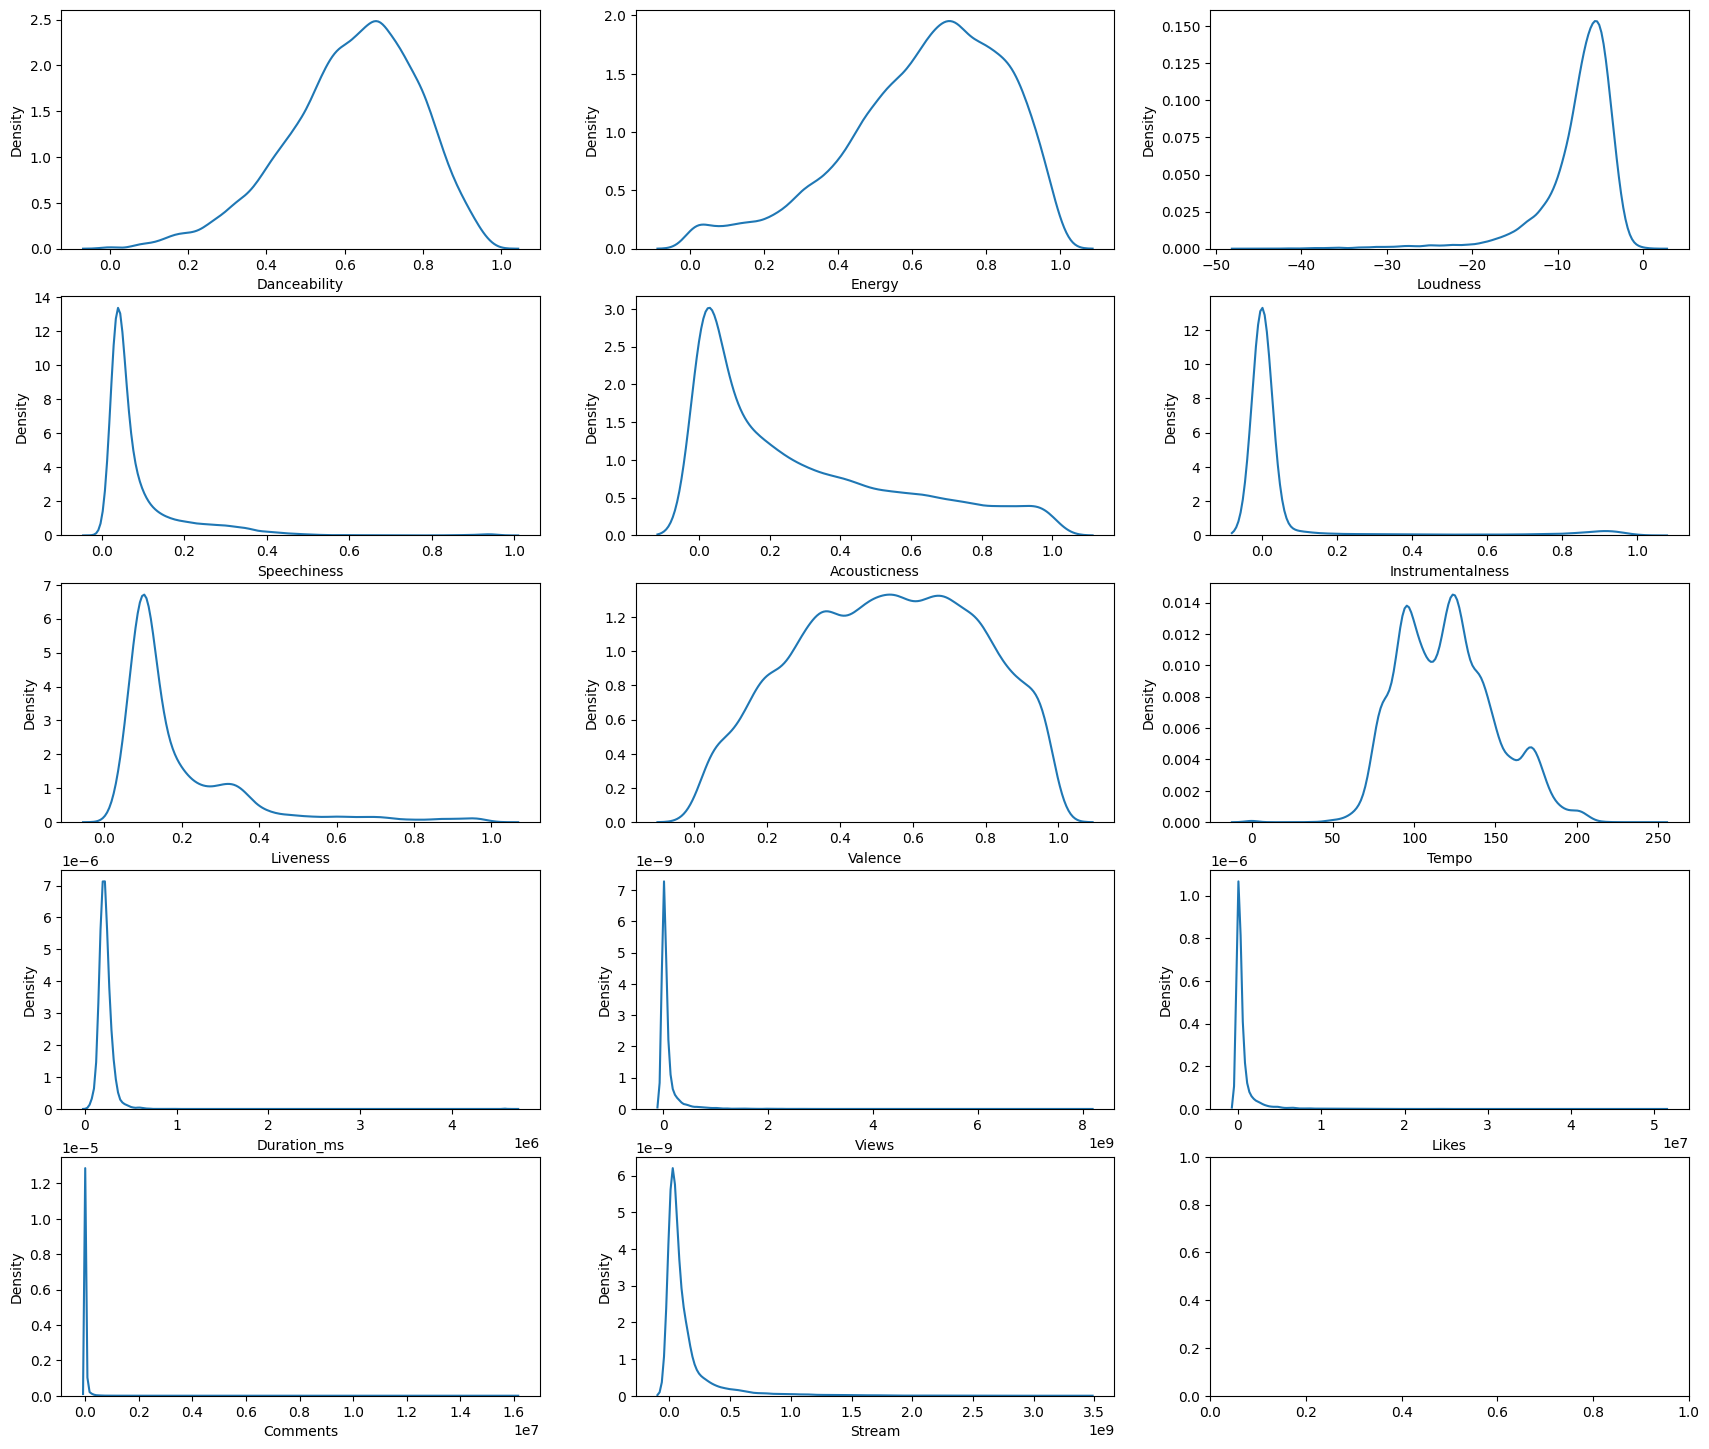

In [79]:
## Distibution of columns
fig, axs = plt.subplots(nrows=5, ncols = 3, figsize = (21,18))
for i in range(len(Float_col)):
    row = i//3
    col = i%3
    sns.kdeplot(Spotify_YT[Float_col[i]], ax=axs[row,col])
plt.show()

In [80]:
right_skewed = ["Stream", "Comments", "Likes", "Views", "Duration_ms", "Speechiness", "Liveness", "Instrumentalness"]
left_skewed = ["Loudness"]

### Bivariate Analysis

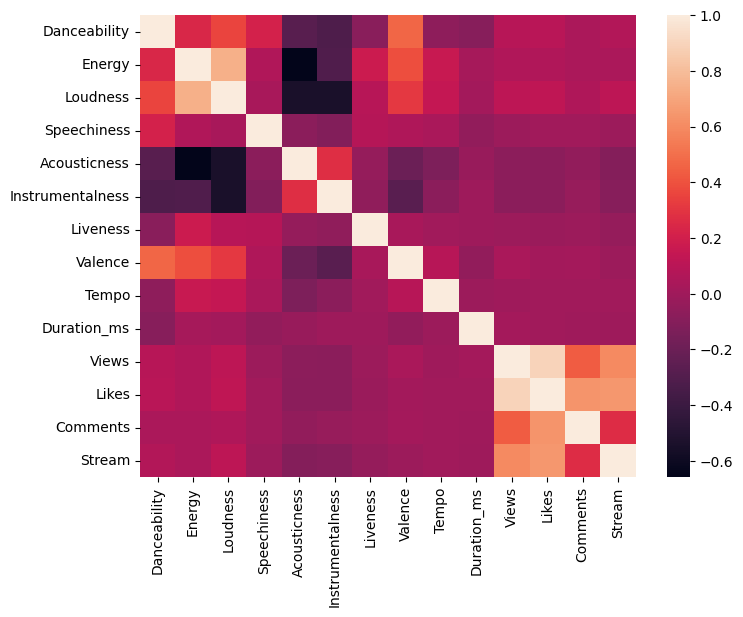

In [81]:
## Correlation without transformation
fig, axs = plt.subplots(nrows=1, ncols = 1, figsize = (8,6))
sns.heatmap(Spotify_YT[Float_col].corr(method="pearson"), ax = axs)
plt.show()

## There is weak linear relationship betweem Stream, Likes, Views

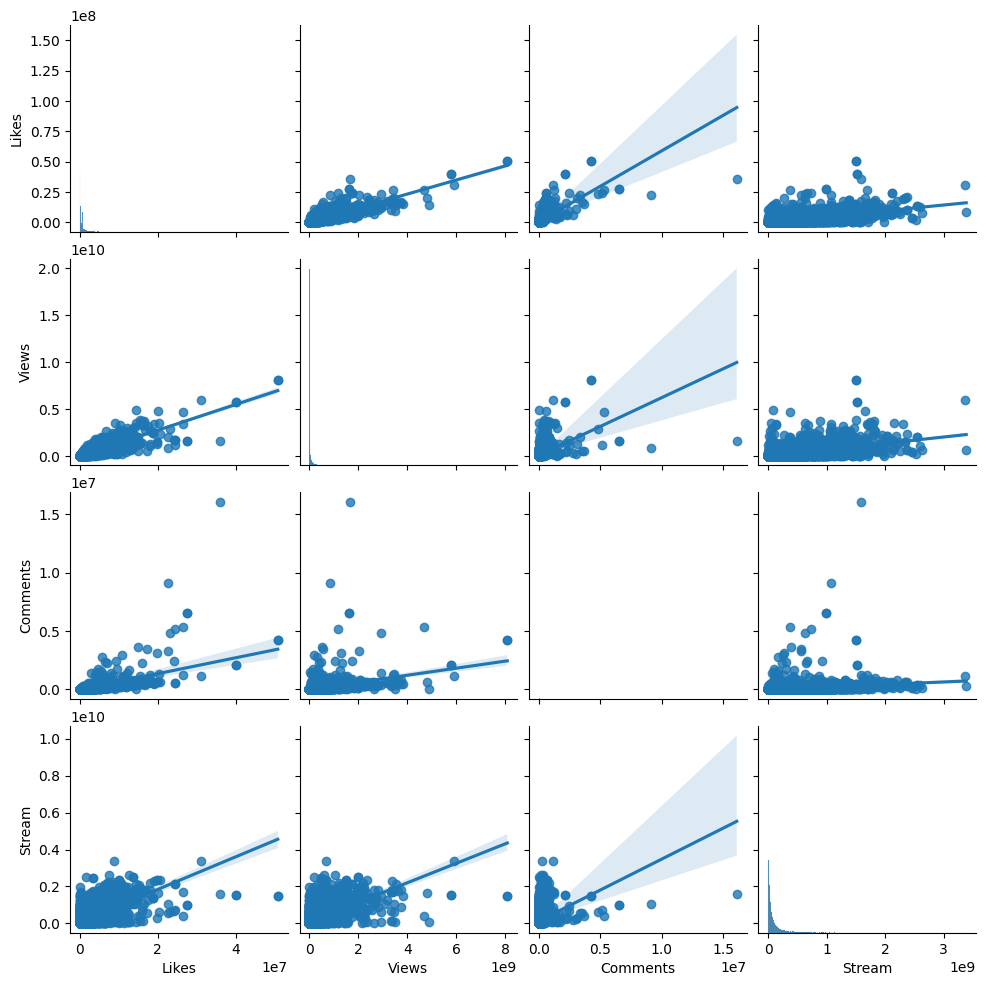

In [82]:
## Likes, Views, Comments, Stream correlation
sns.pairplot(Spotify_YT[["Likes", "Views", "Comments", "Stream"]], kind="reg")
plt.show()

In [83]:
song_features = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]

### Relationship between Song features and their Streams

- More Danceable, Energetic songs have higher streams.
- As speechiness, Liveliness, Loudness decreases stream increases
- Tempo and Valence should neither be too high nor too low.
- Lower Acoustic track have more streams

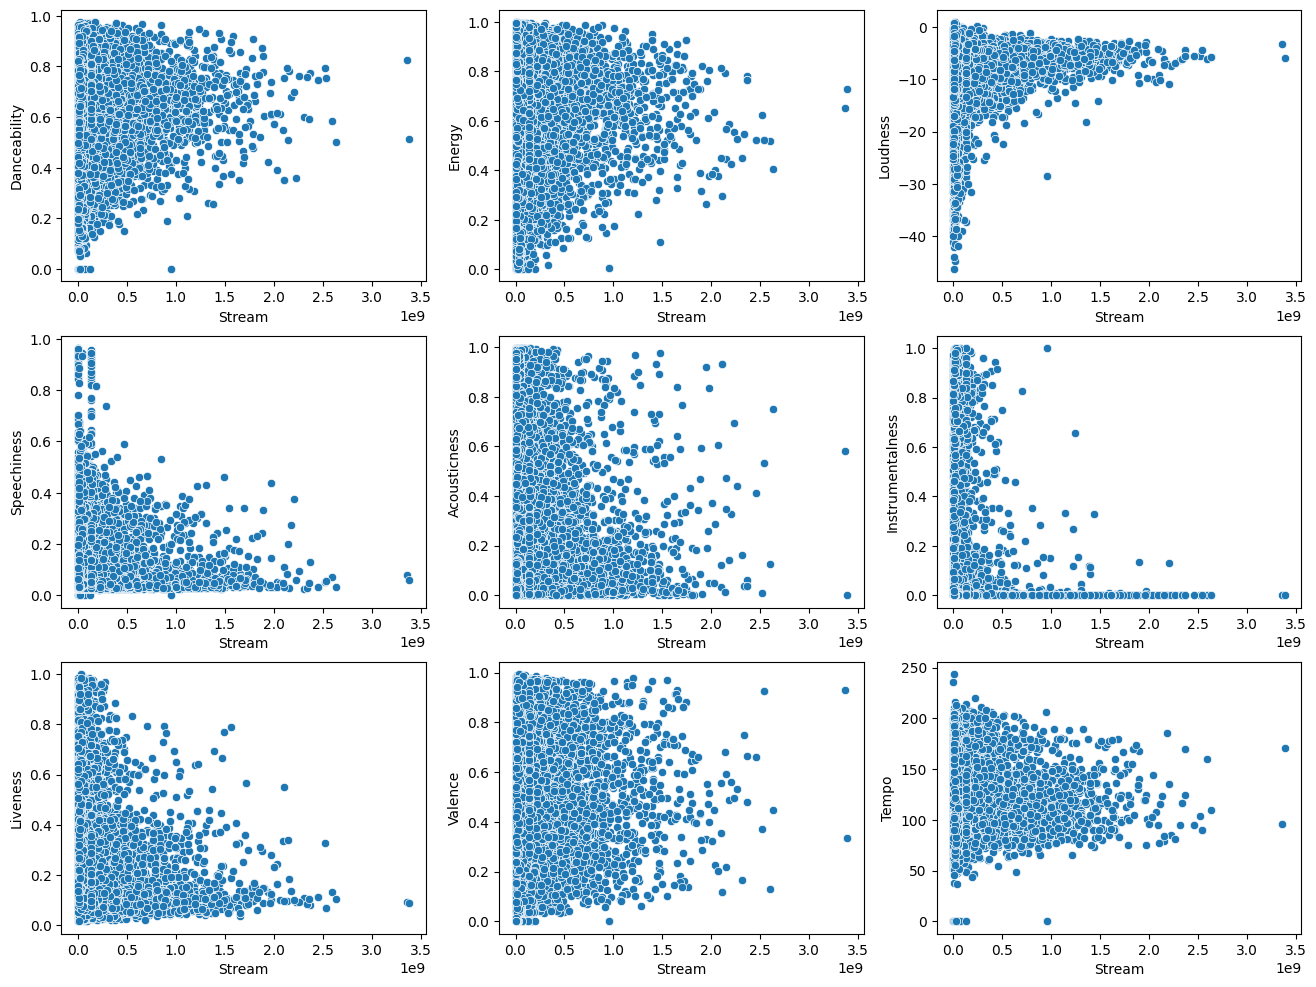

In [84]:
fig, axs =  plt.subplots(nrows=3, ncols = 3, figsize=(16,12))
for i in range(len(song_features)):
    row = i//3
    col = i%3
    sns.scatterplot(data=Spotify_YT, x = "Stream", y = song_features[i], ax = axs[row, col])
plt.show()

- Views behaves similarly as to the stream except for the Valence. As valence increase in the tracks, views increses

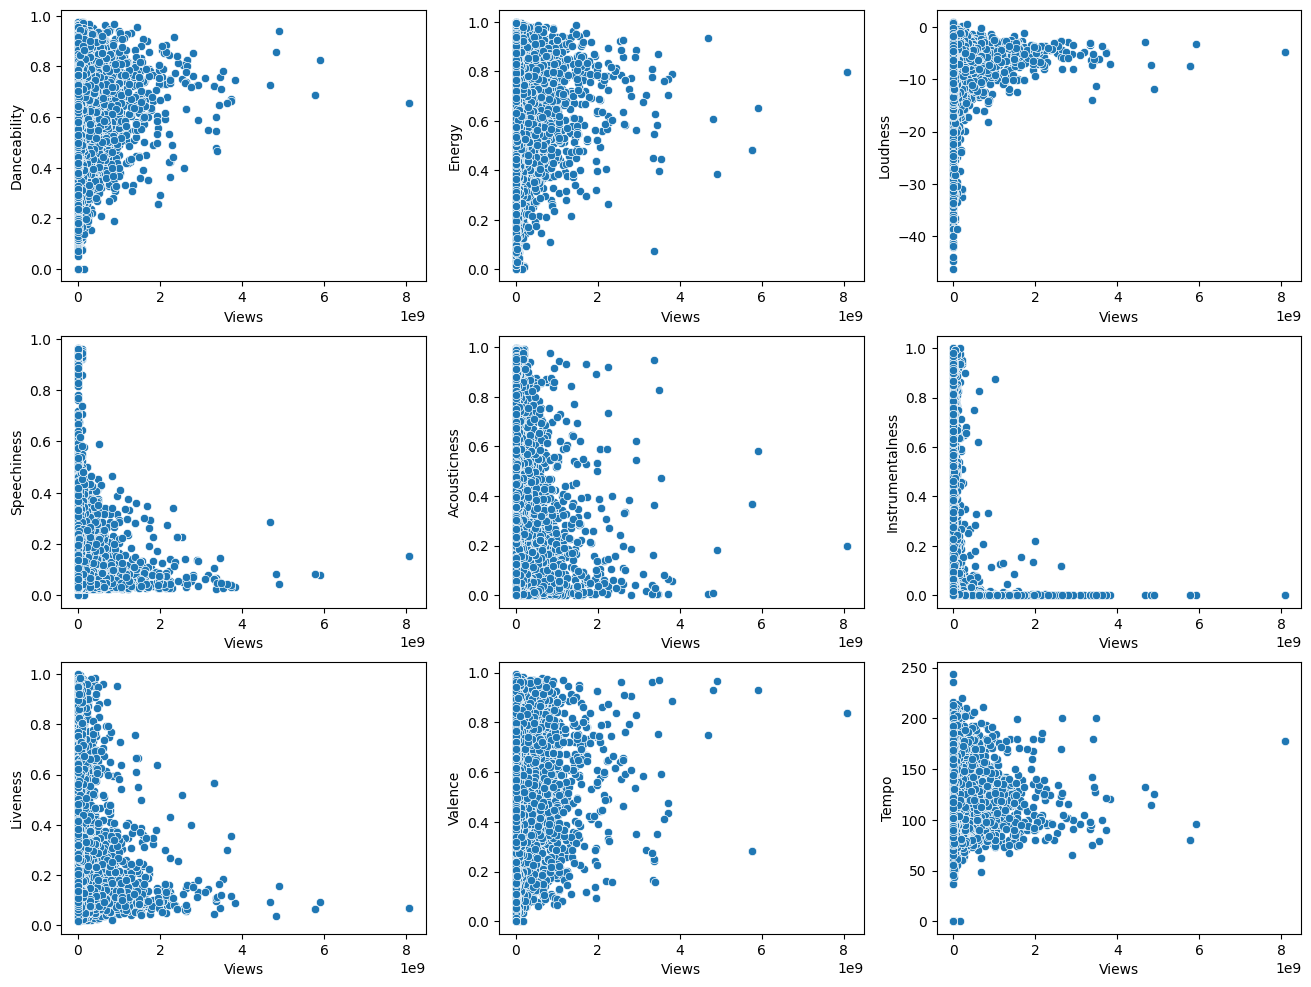

In [85]:
fig, axs =  plt.subplots(nrows=3, ncols = 3, figsize=(16,12))
for i in range(len(song_features)):
    row = i//3
    col = i%3
    sns.scatterplot(data=Spotify_YT, x = "Views", y = song_features[i], ax = axs[row, col])
plt.show()

### Correlation after transformation

- After transformation Stream shows uniform distribution with views and streams. So, i don't think we have captured relationship between the variables correctly

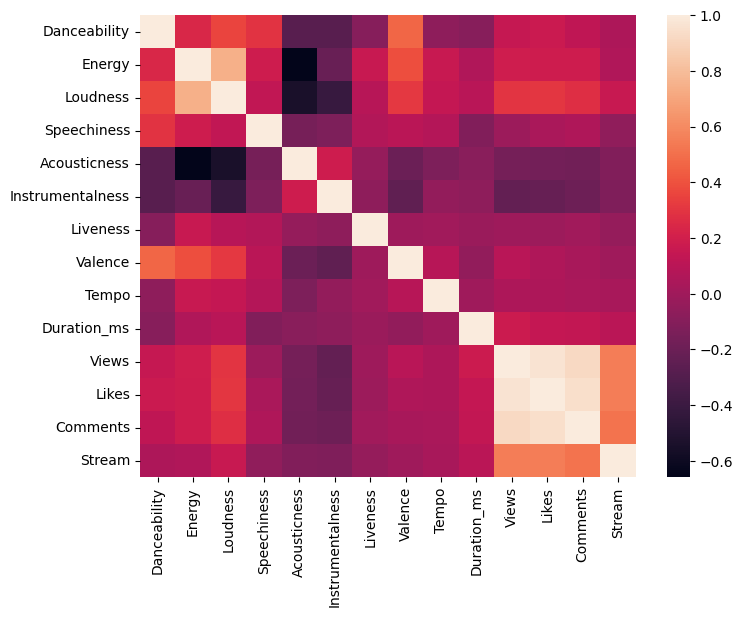

In [86]:
## Correlation after transformation
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (8,6))
Float_var_dat = Spotify_YT[Float_col]
for i in right_skewed:
    Float_var_dat[i] = np.log(Float_var_dat[i])
sns.heatmap(Float_var_dat.corr(method="pearson"), ax = axs)
plt.show()

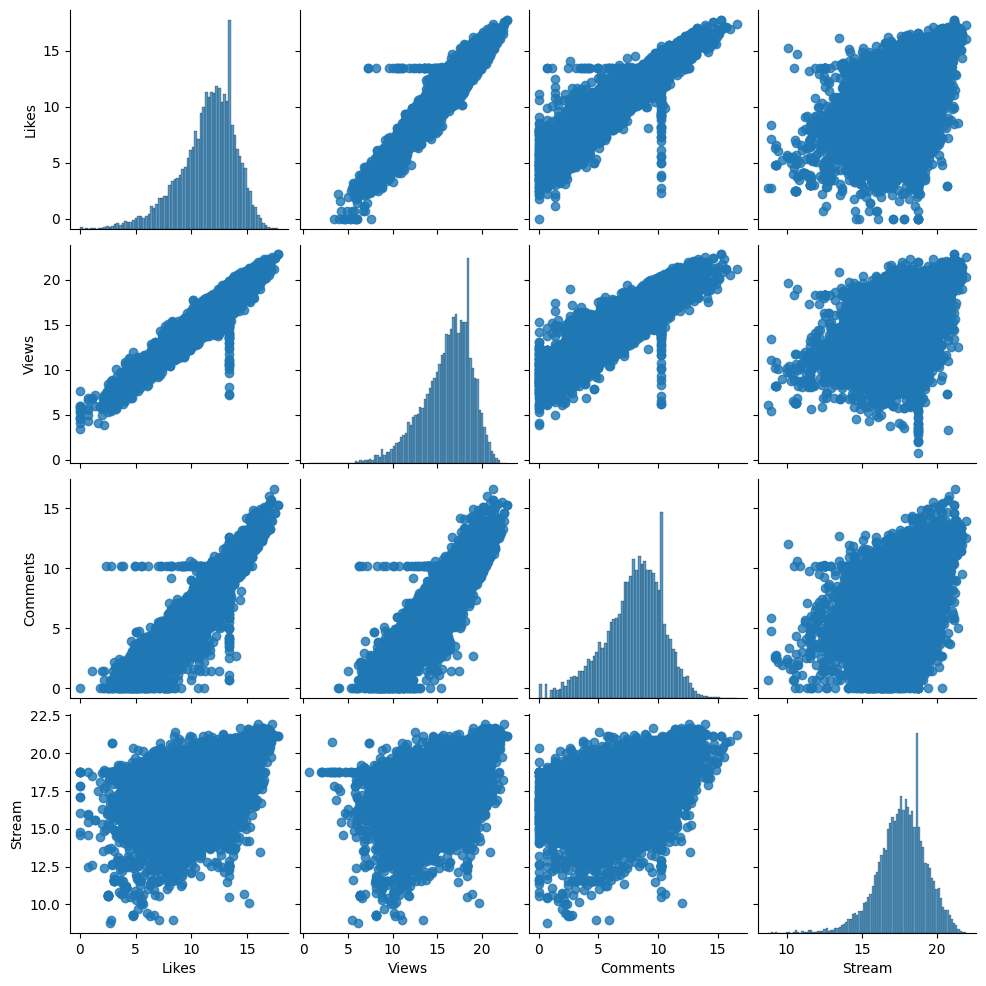

In [87]:
## Comments, Likes and Views have multiplicative relationship
sns.pairplot(Float_var_dat[["Likes", "Views", "Comments", "Stream"]], kind="reg")
plt.show()

## Relationship between variables

- Except for comments everything has linear relationship.
- Comments and Stream have non linear relationship (because they have greater spearman correlation. Check values in table).

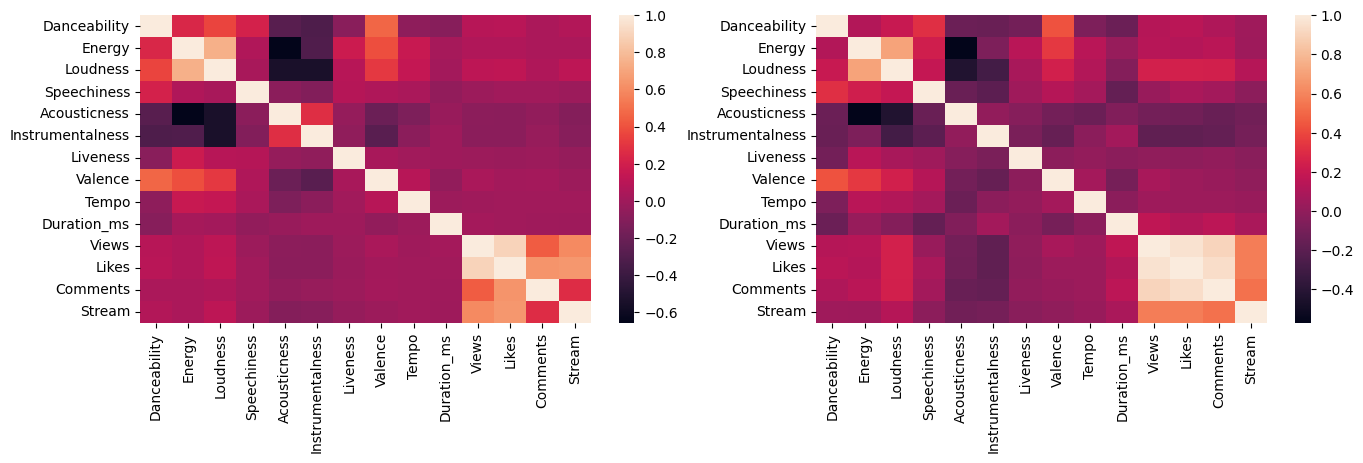

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (16,4))
sns.heatmap(Spotify_YT[Float_col].corr(method="pearson"), ax = axs[0])
sns.heatmap(Spotify_YT[Float_col].corr(method="spearman"), ax = axs[1])
plt.show()

### Does Official video works better than the unofficial video ?

In [89]:
## Paired t test to be used.
Official_Video = Spotify_YT[Spotify_YT["official_video"] == True][["Likes","Views", "Comments", "Stream"]]
Unofficial_Video = Spotify_YT[Spotify_YT["official_video"] == False][["Likes","Views", "Comments", "Stream"]]

In [90]:
Official_Video.describe().T

count         mean          std     min         25%         50%  \
Likes    15723.00    802348.23   1961237.07    0.00    47133.00   192622.00   
Views    15723.00 114494757.46 300852400.79    0.00  4033976.00 23329150.00   
Comments 15723.00     33246.81    213515.33    0.00     1076.50     5074.00   
Stream   15723.00 150215444.97 259585388.80 6574.00 19517439.50 57480006.00   

                  75%           max  
Likes       686168.50   50788652.00  
Views     93279847.00 8079649362.00  
Comments     19350.50   16083138.00  
Stream   150568292.00 3386520288.00

In [91]:
Unofficial_Video.describe().T

count        mean          std      min         25%         50%  \
Likes    4525.00   180333.40    781604.89     0.00     2289.00    17713.00   
Views    4525.00 22508713.97 128289986.66    26.00   193338.00  1787395.00   
Comments 4525.00     7616.58     85748.24     0.00       78.00      533.00   
Stream   4525.00 90640730.36 162661760.53 33709.00 15233324.00 40545567.00   

                  75%           max  
Likes        97203.00   26399133.00  
Views     10910410.00 4679767471.00  
Comments      2793.00    5331537.00  
Stream   103003304.00 2522431995.00

In [92]:
## Groups
Unofficial_Stream = Unofficial_Video["Stream"]
Official_Stream = Official_Video["Stream"]

In [93]:
## Check Assumptions
print("Check Assumption")

if (len(Unofficial_Stream) >= 30) and (len(Official_Stream) >= 30):
    normality_check = True
    print("Normality check : Skipped (sample size > 30, Central Limit Theorem Applied)")
else:
    Official_normality = stats.shapiro(Official_Stream)
    Unofficial_normality = stats.shapiro(Unofficial_Stream)
    normality_check = (Official_normality > 0.05) & (Unofficial_normality > 0.05)

    print("Normality Test (Shapiro-Wilk):")
    print(f"Official group p-value : {Official_normality.pvalue:.4f}")
    print(f"Unofficial group p-value : {Unofficial_normality.pvalue:.4f}")

levene_test = stats.levene(Official_Stream,Unofficial_Stream)
homogeneity_check = levene_test.pvalue > 0.05
print("Homogeneity of Variances Test (Levene's Test):")
print(f"p-value:{levene_test.pvalue:.4f}")

# Perform the appropriate T-Test based on the assumptions
if normality_check:
    if homogeneity_check:
        # Perform the inpendent sample t test
        t_test_result = stats.ttest_ind(Official_Stream,Unofficial_Stream, equal_var=True,alternative='greater')
        test_used = "Independent Samples T Test"
    else:
        # Perform Welch's T-Test
        t_test_result = stats.ttest_ind(Official_Stream, Unofficial_Stream, equal_var=False,alternative='greater')
        test_used = "Welch's T-Test"
else:
    # Perform the Mann -Whitney U Test
    t_test_result = stats.mannwhitneyu(Official_Stream, Unofficial_Stream)
    test_used = "Mann - Whitney U Test"

# Display the results of the t test

t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue

print(f"{test_used} Results:")
print(f"Test Statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
print(f"Significance Level: {alpha}")
if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. Official Songs have greater streams than Unofficial Songs (using {test_used}).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. Unofficial Songs have greater streams than Official Songs (using {test_used}).")

Check Assumption
Normality check : Skipped (sample size > 30, Central Limit Theorem Applied)
Homogeneity of Variances Test (Levene's Test):
p-value:0.0000
Welch's T-Test Results:
Test Statistic: 18.7151
p-value: 0.0000
Significance Level: 0.05
Conclusion: Reject the null hypothesis. Official Songs have greater streams than Unofficial Songs (using Welch's T-Test).


### Kmeans Clustering Algorithm

- As clusters increase silhoutte score decreases, which means songs clusters do not have much gap in between them. Clusters can not be well defined with the given features.

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [95]:
Music_Features = Spotify_YT[Spotify_YT["Album_type"] != "compilation"]
Music_Features = Music_Features[["Uri", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Duration_ms", "Liveness", "Valence", "Tempo"]]
Key_feat = pd.get_dummies(Spotify_YT["Key"], dtype="int")
Music_Features.drop_duplicates(inplace=True)
Music_Features.set_index("Uri", inplace=True)
Music_Features.dropna(inplace=True)

In [96]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Music_Features)

In [97]:
# Elbow method to find optimal number of clusters
inertia = []
k_range = range(1,20)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

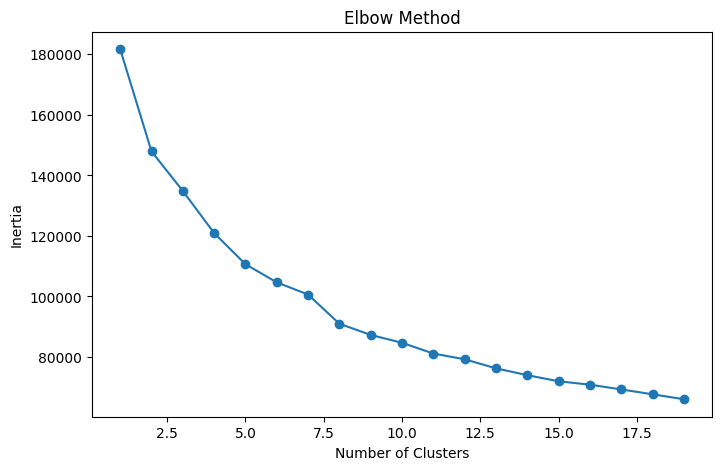

In [98]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [99]:
optimal_k = 2

# Apply k means with optimal number of cluster
kmeans = KMeans(n_clusters = optimal_k, random_state =42)
kmeans.fit(scaled_data)
labels = kmeans.fit_predict(scaled_data)

Music_Features["Cluster"] = kmeans.labels_

In [100]:
## Music Labels
Music_labels = Music_Features.reset_index()
Music_Name = Spotify_YT[["Uri","Track"]].drop_duplicates()
Music_labels = pd.merge(Music_Name, Music_labels, left_on = "Uri", right_on = "Uri").drop(columns = ["Uri"])

In [101]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, labels)

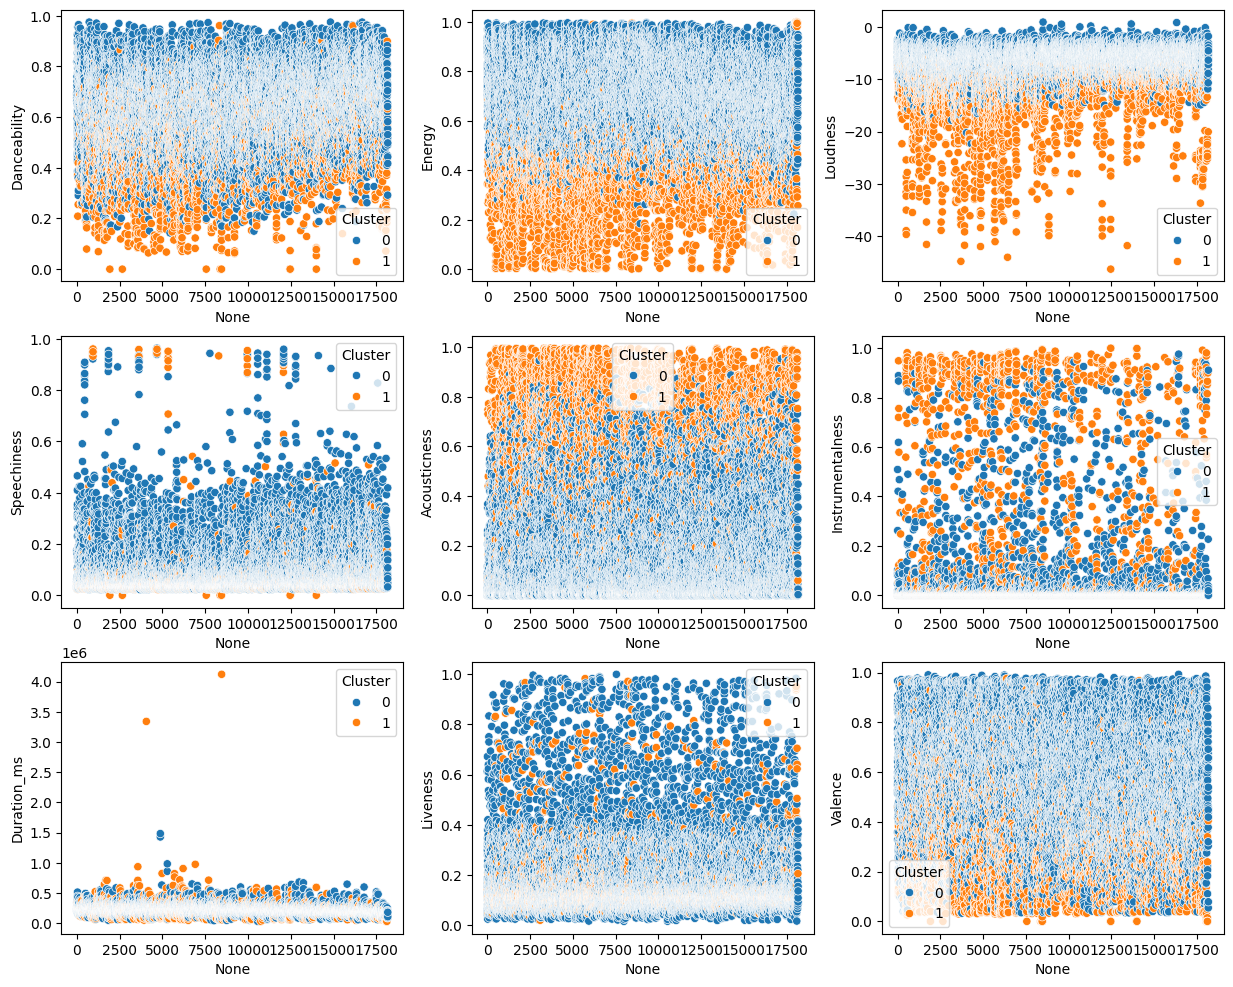

In [102]:
fig, axs = plt.subplots(nrows =3, ncols =3, figsize = (15,12))
idx = 0
clm = Music_labels.columns[1:-1]
for row in range(3):
    for col in range(3):
        sns.scatterplot(x = Music_labels.index, y = Music_labels[clm[idx]], hue = Music_labels["Cluster"], ax = axs[row,col])
        if idx < 9:
            idx += 1
        else: 
            pass
plt.show()

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(n_components=3)

principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3"])

In [108]:
inertia = []
num_of_feat = np.arange(1,20)

for i in num_of_feat:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

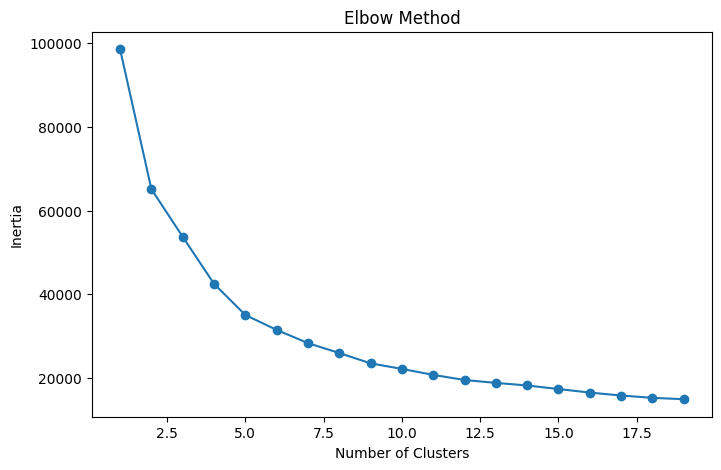

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(num_of_feat, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
labels = kmeans.fit_predict(pca_df)
pca_df["Clusters"] = labels

In [62]:
silhouette_score(scaled_data,labels)

np.float64(0.30388745636448694)

### 3D plot of clusters

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [63]:
fig = go.Figure(data = [go.Scatter3d(
    x = pca_df["PC1"],
    y = pca_df["PC2"],
    z = pca_df["PC3"],
    mode = "markers",
    marker=dict(size = 5, color = pca_df["Clusters"], colorscale = 'viridis', opacity = 0.8)
)])
plt.show()

# Customize layout
fig.update_layout(title = '3D Scatter Plot with continous Hue',
                  scene = dict(
                      xaxis_title = "X Axis",
                      yaxis_title = "Y Axis",
                      zaxis_title = "Z Axis"
                  )
                  )

# show plot
fig.show()